In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


In [74]:
data_dir = '../data'
merged_df = pd.read_csv(os.path.join(data_dir, 'all_merged.csv'))
merged_df = merged_df.drop(['Unnamed: 0'], axis=1)
merged_df

,lon_bounds,lat_bounds,year,burned_area,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,...,tasmax_7,pr_7,tas_8,tasmax_8,pr_8,lccs_class,processed_flag,current_pixel_state,observation_count,change_count
0,-10.0,51.75,2001,0.0,0.447948,1.0,12.300000,16.500000,39.000000,13.400001,...,18.800001,79.000000,15.300000,18.9,102.1,130,1.0,1.0,89,0
1,-10.0,51.75,2002,0.0,0.447948,1.0,11.300000,14.800000,153.700000,13.000000,...,17.700000,68.700005,15.400001,18.9,56.4,130,1.0,1.0,89,0
2,-10.0,51.75,2003,0.0,0.447948,1.0,11.100000,14.500000,119.200005,14.300000,...,19.100000,87.200005,16.600000,20.5,17.2,130,1.0,1.0,89,0
3,-10.0,51.75,2004,0.0,0.447948,1.0,11.500000,15.300000,46.500000,14.400001,...,18.200000,62.900000,16.000000,19.5,109.3,130,1.0,1.0,89,0
4,-10.0,51.75,2005,0.0,0.447948,1.0,10.800000,14.300000,109.200005,14.600000,...,19.100000,71.700005,15.600000,19.2,56.9,130,1.0,1.0,89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254132,50.0,51.75,2015,0.0,0.993698,1.0,17.600000,23.300001,34.400000,24.500000,...,28.000000,39.200000,20.500000,26.9,17.4,10,1.0,1.0,263,0
254133,50.0,51.75,2016,482982.0,0.993698,1.0,17.300001,23.400000,45.900000,20.400000,...,30.100000,38.400000,25.200000,32.4,17.0,10,1.0,1.0,263,0
254134,50.0,51.75,2017,8747340.0,0.993698,1.0,15.100000,20.900000,37.200000,18.700000,...,29.200000,23.700000,23.700000,30.0,6.7,10,1.0,1.0,263,0
254135,50.0,51.75,2018,9122992.0,0.993698,1.0,18.000000,24.800001,21.600000,20.000000,...,31.300001,53.400000,21.500000,28.5,8.3,10,1.0,1.0,263,0


In [75]:
year = 2004
merged_df_plotting = merged_df[merged_df['year'] == year]

plt.figure(figsize=(15,7))
sns.scatterplot(data=merged_df_plotting, x='lon_bounds', y='lat_bounds', hue = 'burned_area')
plt.legend(loc='upper left');

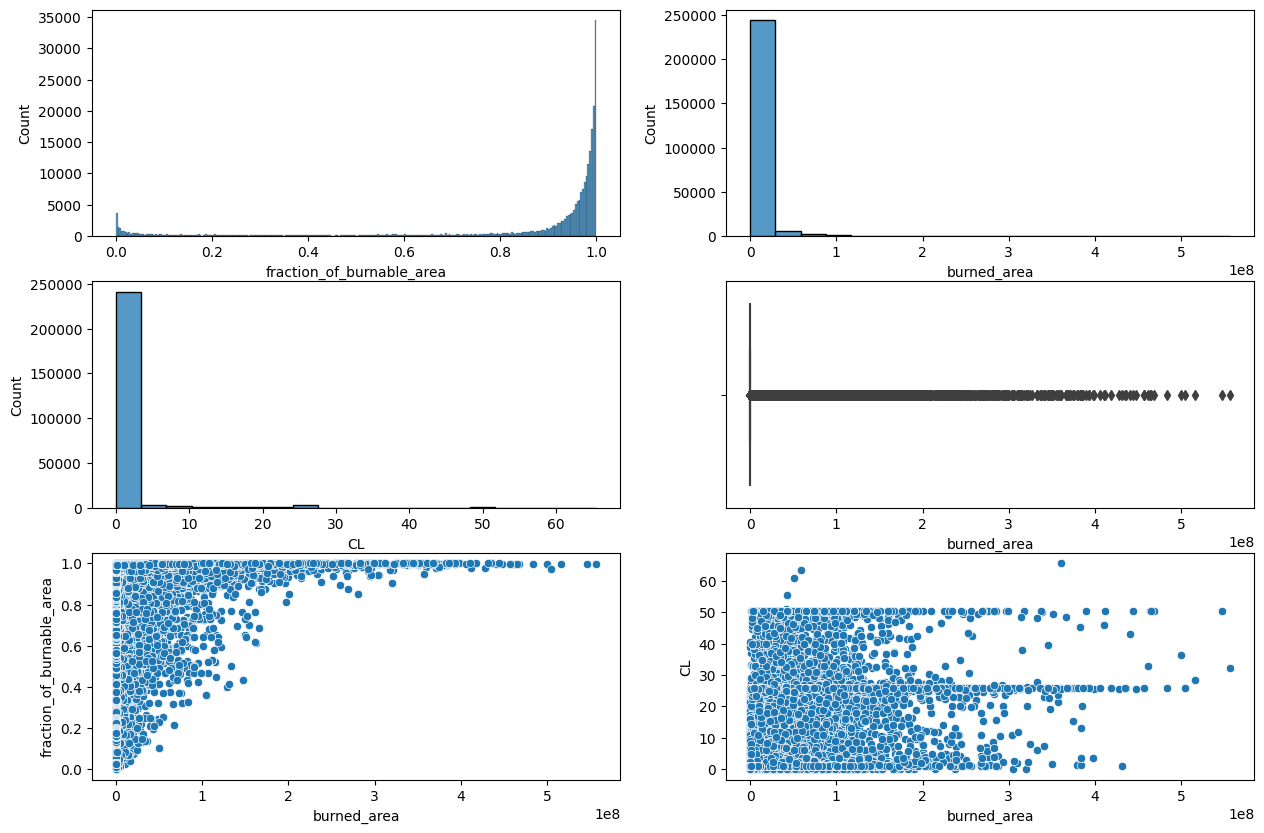

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

sns.histplot(merged_df['fraction_of_burnable_area'], ax=ax1)
sns.histplot(merged_df['burned_area'], ax=ax2)
sns.histplot(merged_df['CL'], ax=ax3)
sns.boxplot(data = merged_df, x= 'burned_area', ax=ax4)
sns.scatterplot(data=merged_df, x='burned_area', y='fraction_of_burnable_area', ax=ax5)
sns.scatterplot(data=merged_df, x='burned_area', y='CL', ax=ax6)

plt.show();


 # filtering dataset

1. seems there is one outlier in burned area 
2. the distribution for 'fraction_of_burnable_area' is skewd and data wit less than 80% could be removed

In [ ]:
merged_df_filtered = merged_df[merged_df['fraction_of_burnable_area'] >= 0.9]
#mask = (merged_df_filtered['CL'] > 50) # keeps only pixels where confidance that burning is real is abou 50%
#merged_df_filtered = merged_df_filtered[mask].reset_index(drop=True)
#merged_df_filtered = merged_df_filtered[merged_df_filtered['CL'] > 0]
merged_df_filtered = merged_df_filtered.reset_index(drop=True)
merged_df_filtered

,lon_bounds,lat_bounds,year,burned_area,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,...,tasmax_7,pr_7,tas_8,tasmax_8,pr_8,lccs_class,processed_flag,current_pixel_state,observation_count,change_count
0,-9.75,52.00,2001,0.0,0.935792,0.0,11.400001,15.300000,47.500000,12.500000,...,17.500000,98.3,14.400001,17.700000,139.700000,210,1.0,2.0,156,0
1,-9.75,52.00,2002,0.0,0.935680,0.0,10.500000,13.700000,181.700000,12.100000,...,16.400000,89.9,14.400001,17.600000,78.400000,210,1.0,2.0,156,0
2,-9.75,52.00,2003,0.0,0.935567,0.0,10.300000,13.400001,140.300000,13.400001,...,17.800001,110.9,15.700000,19.400000,23.800001,210,1.0,2.0,156,0
3,-9.75,52.00,2004,0.0,0.935342,0.0,10.700000,14.200000,54.600002,13.500000,...,16.900000,80.3,15.100000,18.300001,151.600000,210,1.0,2.0,156,0
4,-9.75,52.00,2005,0.0,0.935342,0.0,10.000000,13.200000,127.300000,13.700000,...,17.800001,93.4,14.700000,18.000000,76.800000,210,1.0,2.0,156,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184129,50.00,51.75,2015,0.0,0.993698,1.0,17.600000,23.300001,34.400000,24.500000,...,28.000000,39.2,20.500000,26.900000,17.400000,10,1.0,1.0,263,0
184130,50.00,51.75,2016,482982.0,0.993698,1.0,17.300001,23.400000,45.900000,20.400000,...,30.100000,38.4,25.200000,32.400000,17.000000,10,1.0,1.0,263,0
184131,50.00,51.75,2017,8747340.0,0.993698,1.0,15.100000,20.900000,37.200000,18.700000,...,29.200000,23.7,23.700000,30.000000,6.700000,10,1.0,1.0,263,0
184132,50.00,51.75,2018,9122992.0,0.993698,1.0,18.000000,24.800001,21.600000,20.000000,...,31.300001,53.4,21.500000,28.500000,8.300000,10,1.0,1.0,263,0


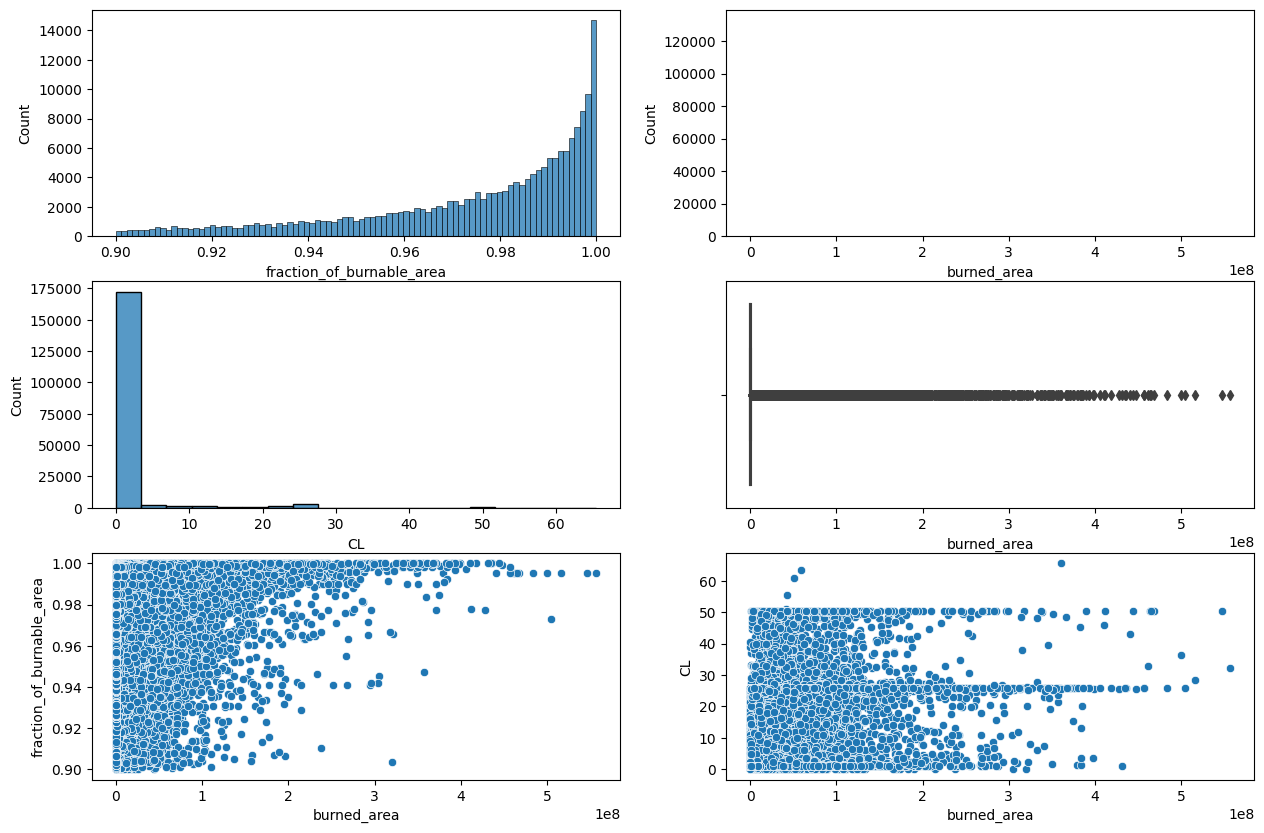

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

sns.histplot(merged_df_filtered['fraction_of_burnable_area'], ax=ax1)
sns.histplot(merged_df_filtered['burned_area'], ax=ax2)
sns.histplot(merged_df_filtered['CL'], ax=ax3)
sns.boxplot(data = merged_df_filtered, x= 'burned_area', ax=ax4)
sns.scatterplot(data=merged_df_filtered, x='burned_area', y='fraction_of_burnable_area', ax=ax5)
sns.scatterplot(data=merged_df_filtered, x='burned_area', y='CL', ax=ax6)

plt.show();

I would not remove more of the burned area 'outliers' since the outliers are what we are actually looking for

# Splitting the data

In [ ]:
y = merged_df_filtered['burned_area']
X = merged_df_filtered.drop('burned_area', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (128893, 22)
y_train:  (128893,)
X_test:  (55241, 22)
y_test:  (55241,)


# Normalisation

## longitude and latitude

We don't want to use lon and lat as input varibales. So we don't need to normalize them.

## year

In [ ]:
ohe = OneHotEncoder(sparse = False) 

ohe.fit(X_train[['year']])
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[['year']])
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[['year']])

X_train

/Users/arnaudgoussebaile/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
1371,-8.00,39.25,2015,0.977987,1.00,19.300001,25.800001,7.500000,22.800001,29.600000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33633,3.25,39.50,2007,0.974216,1.00,19.200000,24.400000,11.200000,23.300001,28.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86763,22.50,47.00,2003,0.973257,1.00,18.700000,25.100000,46.900000,20.900000,27.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67046,16.50,49.25,2018,0.973971,1.00,16.300001,22.000000,47.000000,17.700000,23.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59184,13.75,42.25,2007,0.938195,1.00,14.200000,18.300001,85.000000,18.200000,22.700000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,32.75,49.75,2009,0.986526,1.00,15.800000,21.500000,39.500000,21.000000,26.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103694,27.50,43.00,2008,0.956978,1.00,16.200000,21.500000,34.500000,21.500000,27.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131932,36.50,47.50,2007,0.965691,1.25,18.300001,25.100000,22.800001,21.900000,28.300001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146867,41.00,49.50,2004,0.996036,1.00,15.200000,20.100000,54.800000,18.900000,24.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## fire data

### fraction_of_burnable_area
this is already in a range of 0 - 1

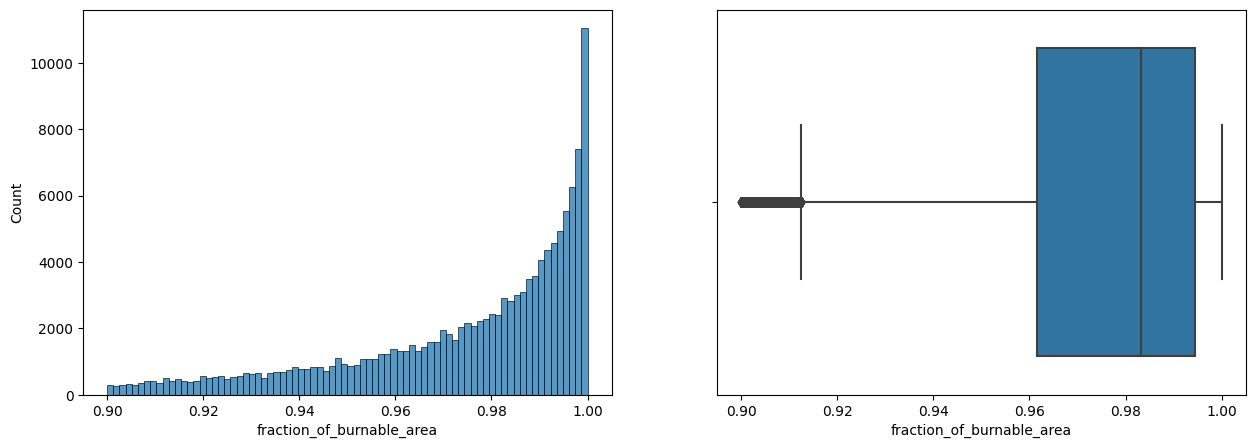

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['fraction_of_burnable_area'], ax= ax1)
sns.boxplot(data = X_train, x= 'fraction_of_burnable_area', ax=ax2);

the distribution is not normal and there are outliers. I will perform Robust Scaer as well but not sure whether this is neccessary

In [ ]:
rb_scaler = RobustScaler()

rb_scaler.fit(X_train[['fraction_of_burnable_area']])
X_train[['fraction_of_burnable_area']] = rb_scaler.transform(X_train[['fraction_of_burnable_area']])
X_test[['fraction_of_burnable_area']] = rb_scaler.transform(X_test[['fraction_of_burnable_area']])

X_train.head()

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
1371,-8.00,39.25,2015,-0.158634,1.0,19.300001,25.800001,7.5,22.800001,29.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33633,3.25,39.50,2007,-0.273764,1.0,19.200000,24.400000,11.2,23.300001,28.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86763,22.50,47.00,2003,-0.303021,1.0,18.700000,25.100000,46.9,20.900000,27.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67046,16.50,49.25,2018,-0.281244,1.0,16.300001,22.000000,47.0,17.700000,23.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59184,13.75,42.25,2007,-1.373241,1.0,14.200000,18.300001,85.0,18.200000,22.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


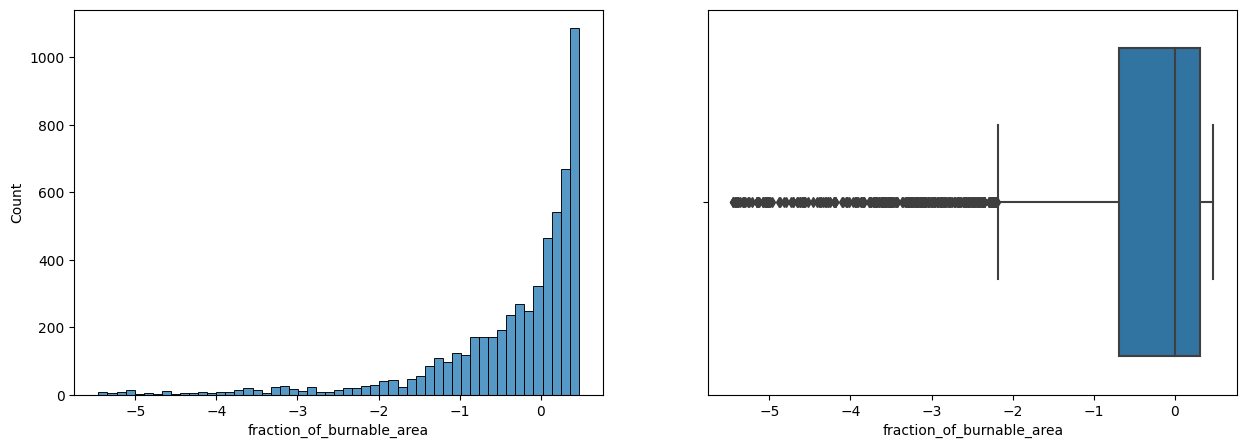

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['fraction_of_burnable_area'], ax= ax1)
sns.boxplot(data = X_train, x= 'fraction_of_burnable_area', ax=ax2);

### confidance of pixel actually burning

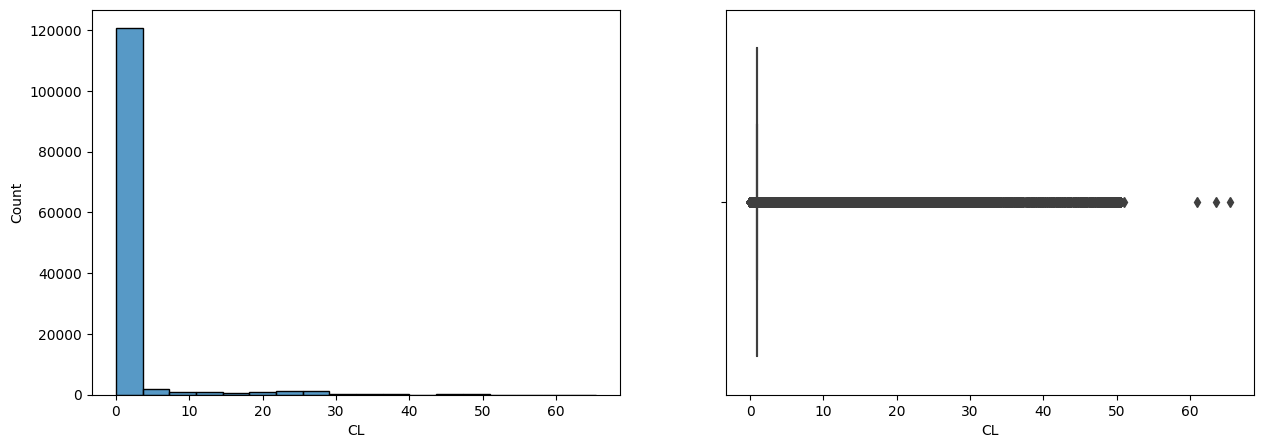

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['CL'], ax= ax1)
sns.boxplot(data = X_train, x= 'CL', ax=ax2);

no outliers but also not a normal distribution so I am using MinMaxScaler

In [ ]:
mm_scaler = MinMaxScaler()

rb_scaler.fit(X_train[['CL']])
X_train[['CL']] = rb_scaler.transform(X_train[['CL']])
X_test[['CL']] = rb_scaler.transform(X_test[['CL']])
X_train.head()

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
1371,-8.00,39.25,2015,-0.158634,0.0,19.300001,25.800001,7.5,22.800001,29.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33633,3.25,39.50,2007,-0.273764,0.0,19.200000,24.400000,11.2,23.300001,28.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86763,22.50,47.00,2003,-0.303021,0.0,18.700000,25.100000,46.9,20.900000,27.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67046,16.50,49.25,2018,-0.281244,0.0,16.300001,22.000000,47.0,17.700000,23.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59184,13.75,42.25,2007,-1.373241,0.0,14.200000,18.300001,85.0,18.200000,22.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


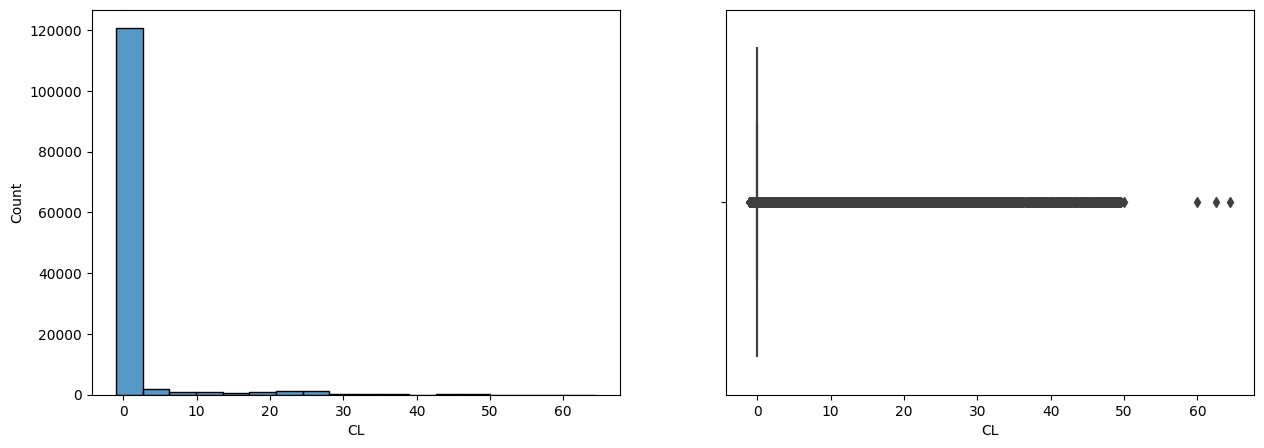

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['CL'], ax= ax1)
sns.boxplot(data = X_train, x= 'CL', ax=ax2);

## climate data

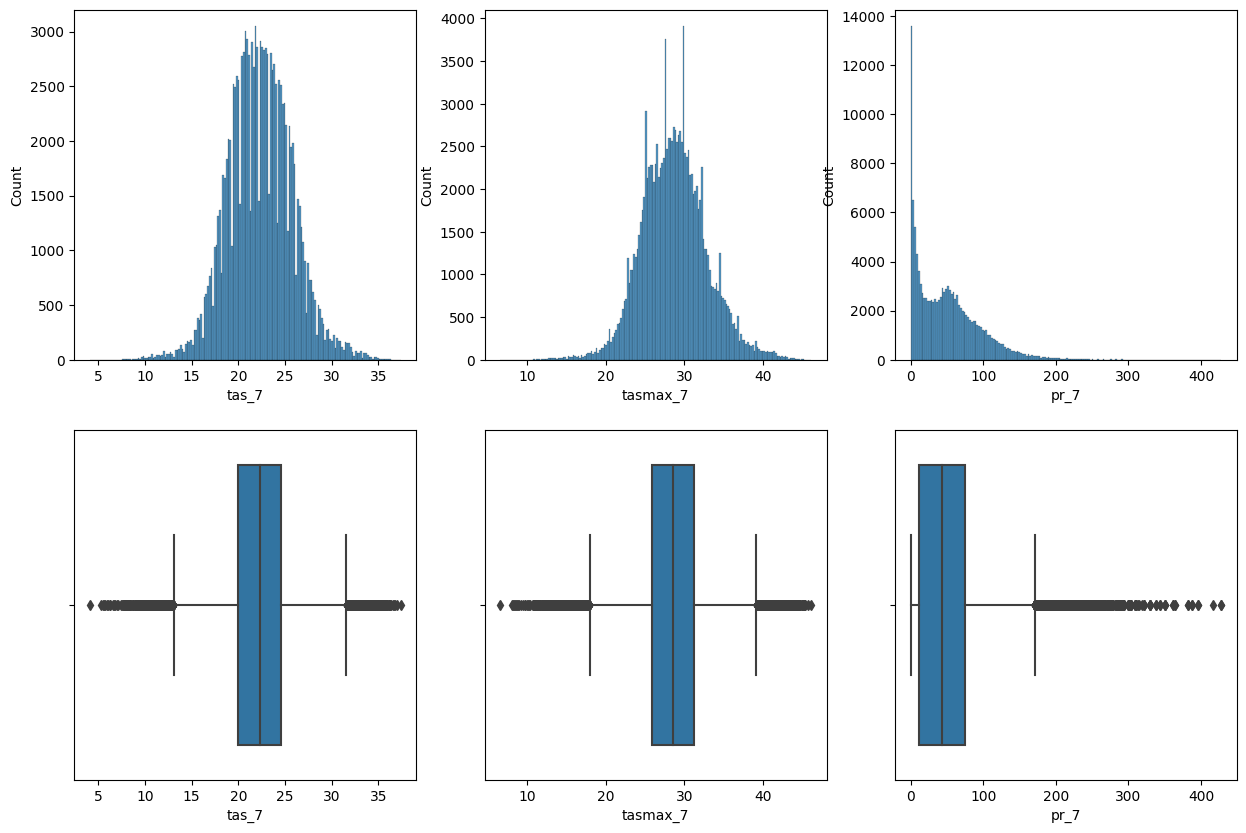

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(X_train['tas_7'], ax= ax1)
sns.histplot(X_train['tasmax_7'], ax= ax2)
sns.histplot(X_train['pr_7'], ax= ax3)

sns.boxplot(data = X_train, x= 'tas_7', ax=ax4)
sns.boxplot(data = X_train, x= 'tasmax_7', ax=ax5)
sns.boxplot(data = X_train, x= 'pr_7', ax=ax6);

tas and maxtas seem to have normal distribution but there are some outliers so I am using RobustScaler on all three

In [ ]:
rb_scaler = RobustScaler()

for i in range(5,9):
    tas = f'tas_{i}'
    tasmax = f'tasmax_{i}'
    pr = f'pr_{i}'
    rb_scaler.fit(X_train[[tas, tasmax, pr]])
    X_train[[tas, tasmax, pr]] = rb_scaler.transform(X_train[[tas, tasmax, pr]])
    X_test[[tas, tasmax, pr]] = rb_scaler.transform(X_test[[tas, tasmax, pr]])

X_train.head()

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
1371,-8.00,39.25,2015,-0.158634,0.0,0.921053,0.976744,-1.021459,0.697674,0.74,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33633,3.25,39.50,2007,-0.273764,0.0,0.894737,0.651163,-0.942060,0.813953,0.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86763,22.50,47.00,2003,-0.303021,0.0,0.763158,0.813953,-0.175966,0.255814,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67046,16.50,49.25,2018,-0.281244,0.0,0.131579,0.093023,-0.173820,-0.488372,-0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59184,13.75,42.25,2007,-1.373241,0.0,-0.421053,-0.767441,0.641631,-0.372093,-0.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


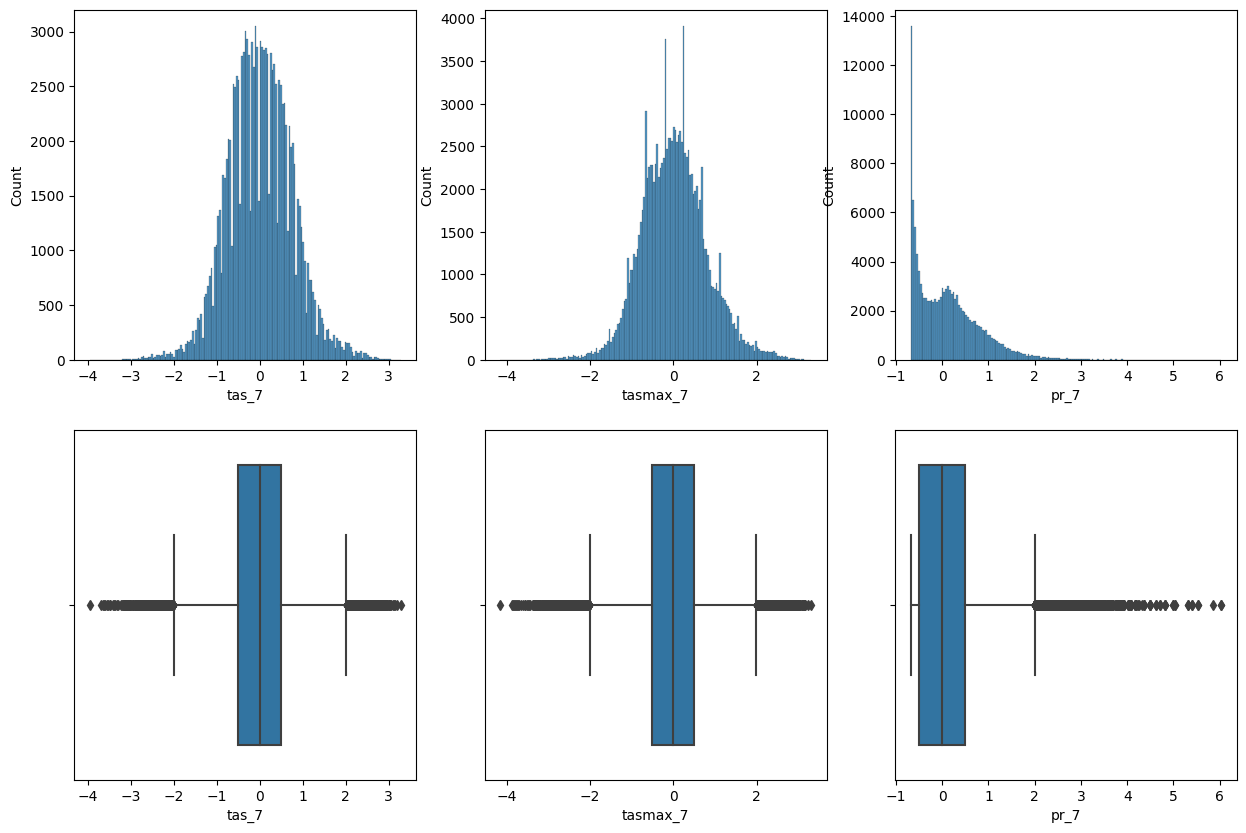

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(X_train['tas_7'], ax= ax1)
sns.histplot(X_train['tasmax_7'], ax= ax2)
sns.histplot(X_train['pr_7'], ax= ax3)

sns.boxplot(data = X_train, x= 'tas_7', ax=ax4)
sns.boxplot(data = X_train, x= 'tasmax_7', ax=ax5)
sns.boxplot(data = X_train, x= 'pr_7', ax=ax6);

## landcover data

lccs_is are classes so I use OneHot Encoder

In [ ]:
ohe = OneHotEncoder(sparse = False) 

ohe.fit(X_train[['lccs_class']])
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[['lccs_class']])
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[['lccs_class']])

X_train.head()

/Users/arnaudgoussebaile/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,lccs_class_122,lccs_class_130,lccs_class_150,lccs_class_153,lccs_class_160,lccs_class_180,lccs_class_190,lccs_class_200,lccs_class_201,lccs_class_210
1371,-8.00,39.25,2015,-0.158634,0.0,0.921053,0.976744,-1.021459,0.697674,0.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33633,3.25,39.50,2007,-0.273764,0.0,0.894737,0.651163,-0.942060,0.813953,0.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86763,22.50,47.00,2003,-0.303021,0.0,0.763158,0.813953,-0.175966,0.255814,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67046,16.50,49.25,2018,-0.281244,0.0,0.131579,0.093023,-0.173820,-0.488372,-0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59184,13.75,42.25,2007,-1.373241,0.0,-0.421053,-0.767441,0.641631,-0.372093,-0.64,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Saving normailzed data

In [ ]:
X_train.head()

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,lccs_class_122,lccs_class_130,lccs_class_150,lccs_class_153,lccs_class_160,lccs_class_180,lccs_class_190,lccs_class_200,lccs_class_201,lccs_class_210
1371,-8.00,39.25,2015,-0.158634,0.0,0.921053,0.976744,-1.021459,0.697674,0.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33633,3.25,39.50,2007,-0.273764,0.0,0.894737,0.651163,-0.942060,0.813953,0.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86763,22.50,47.00,2003,-0.303021,0.0,0.763158,0.813953,-0.175966,0.255814,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67046,16.50,49.25,2018,-0.281244,0.0,0.131579,0.093023,-0.173820,-0.488372,-0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59184,13.75,42.25,2007,-1.373241,0.0,-0.421053,-0.767441,0.641631,-0.372093,-0.64,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.head()

1371           0.0
33633          0.0
86763          0.0
67046          0.0
59184    8801005.0
Name: burned_area, dtype: float64

In [ ]:
X_train.to_csv('../data/X_train.csv')
y_train.to_csv('../data/y_train.csv')
X_test.to_csv('../data/X_test.csv')
y_test.to_csv('../data/y_test.csv')